In [1]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist

In [2]:
basepath ="/Users/kazuki/Documents/Study/data/ryukyu2/{}"
rftri    = basepath.format("gram3/pattern/{}/{}.xlsx")
# rfcos    = basepath.format("gram3/cosSim/{}/distanceMatrix.xlsx")
rflocate = basepath.format("locations.xlsx")
rfword   = basepath.format("sheetlist.xlsx")

In [3]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

In [4]:
symbols=list(locateDf.iloc[:,0])
locates = list(locateDf.iloc[:,2])
hyouzi = list(locateDf.iloc[:,1])
words   = list(wordDf.iloc[:,0])

In [5]:
color_set=["#000000","#800000",
    "#ff0000","#800080",
    "#ff8c00","#ff00ff",
    "#008000","#808000",
    "#000080","#ff6633"]

# 地点ごとの発音

In [29]:
rftri=basepath.format("gram3/counter/all.xlsx")
triDf=pd.read_excel(rftri, sheet_name=0, header=0, index_col=0)

In [30]:
himethod='ward'
newdata=triDf.values
newdata=newdata.T
pdis=dist.pdist(newdata,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

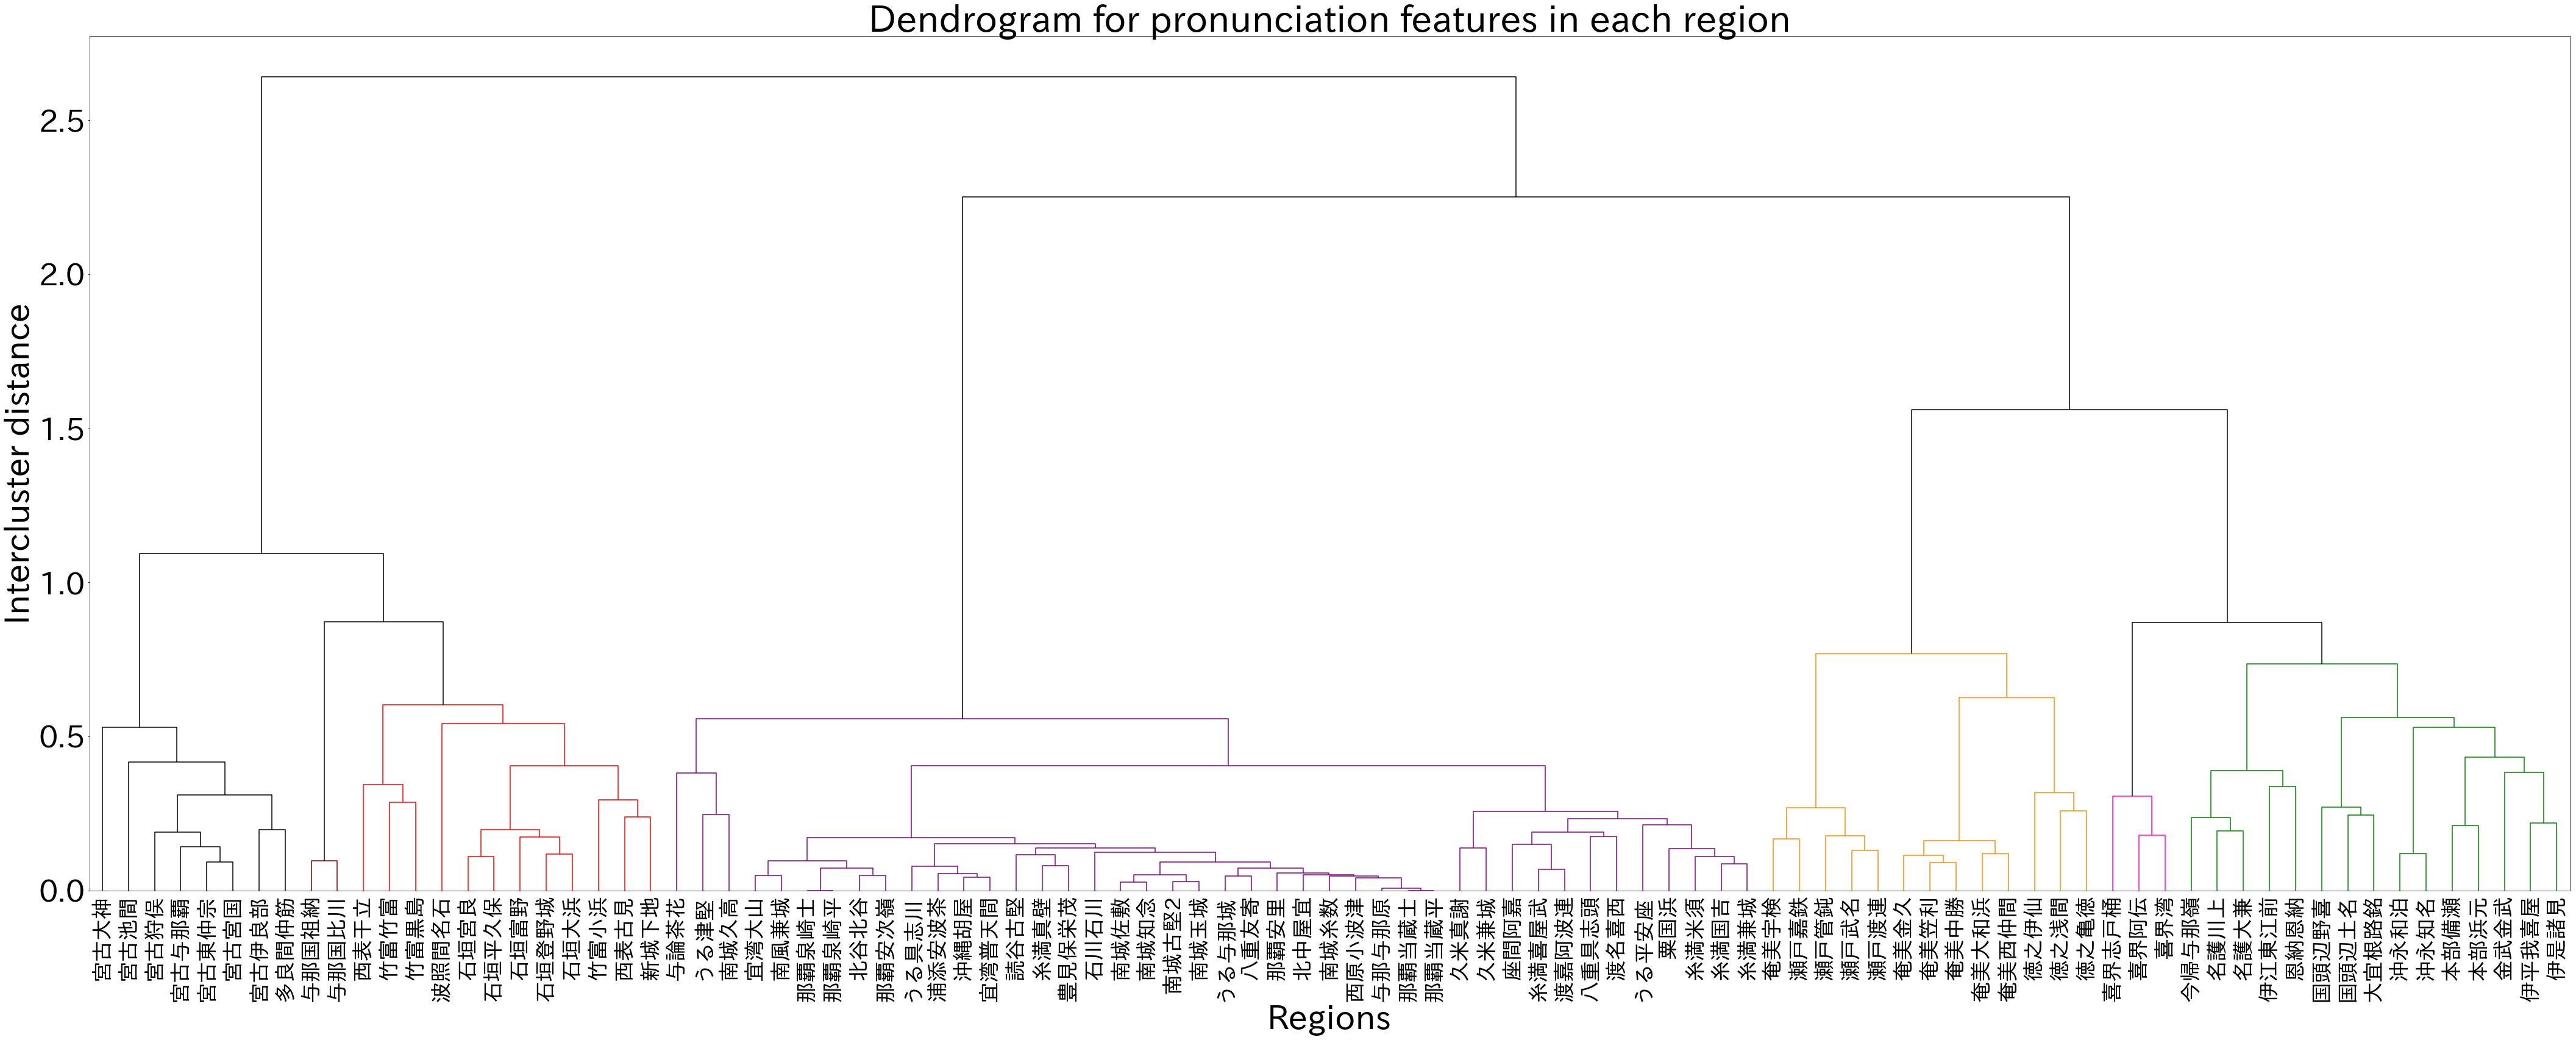

In [31]:
#図の生成
figtitle='Dendrogram for pronunciation features in each region'
savefile=basepath.format("gram3/pic/dendAE.png")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
hierarchy.set_link_color_palette(color_set) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0.3 * np.max(z[:, 2]), # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()

# z = hierarchy.linkage(newdata, method=himethod,metric="cosine")
# linkage_result = linkage(iris_df, method='ward', metric='euclidean')
# # クラスタ分けするしきい値を決める
# threshold = 0.7 * np.max(linkage_result[:, 2])
# # 階層型クラスタリングの可視化
# plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
# dendrogram(linkage_result, labels=iris_labels, color_threshold=threshold)
# plt.show()
# # クラスタリング結果の値を取得
# clustered = fcluster(linkage_result, threshold, criterion='distance')

In [32]:
threshold = 0.3 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)
wf=basepath.format("gram3/counter/AE.csv")
wdf=pd.DataFrame(hyouzi,index=hyouzi, columns=["市町村"])
wdf["グループ"]=c
wdf.to_csv(wf,header=False, index=False) #シート名[地点名]

[5 5 5 5 5 5 5 5 5 5 6 6 6 5 5 5 7 7 4 7 7 7 7 7 7 7 7 7 7 7 7 7 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1
 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 2]


# 地域間の音のずれ

## 初作成時

In [6]:
rftri=basepath.format("gram3/pattern/cvc/{}.xlsx")
distanceMatrix=[0 for i in locates]
for i,locate in enumerate(locates):
    triDf=pd.read_excel(rftri.format(locate), sheet_name=0, header=0, index_col=0)
    tmp=triDf.values
    distanceMatrix[i]=tmp.flatten()

In [7]:
pdis=dist.pdist(distanceMatrix,'cosine')
himethod='ward'
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")#metric="cosine"

## 距離行列完成済み時

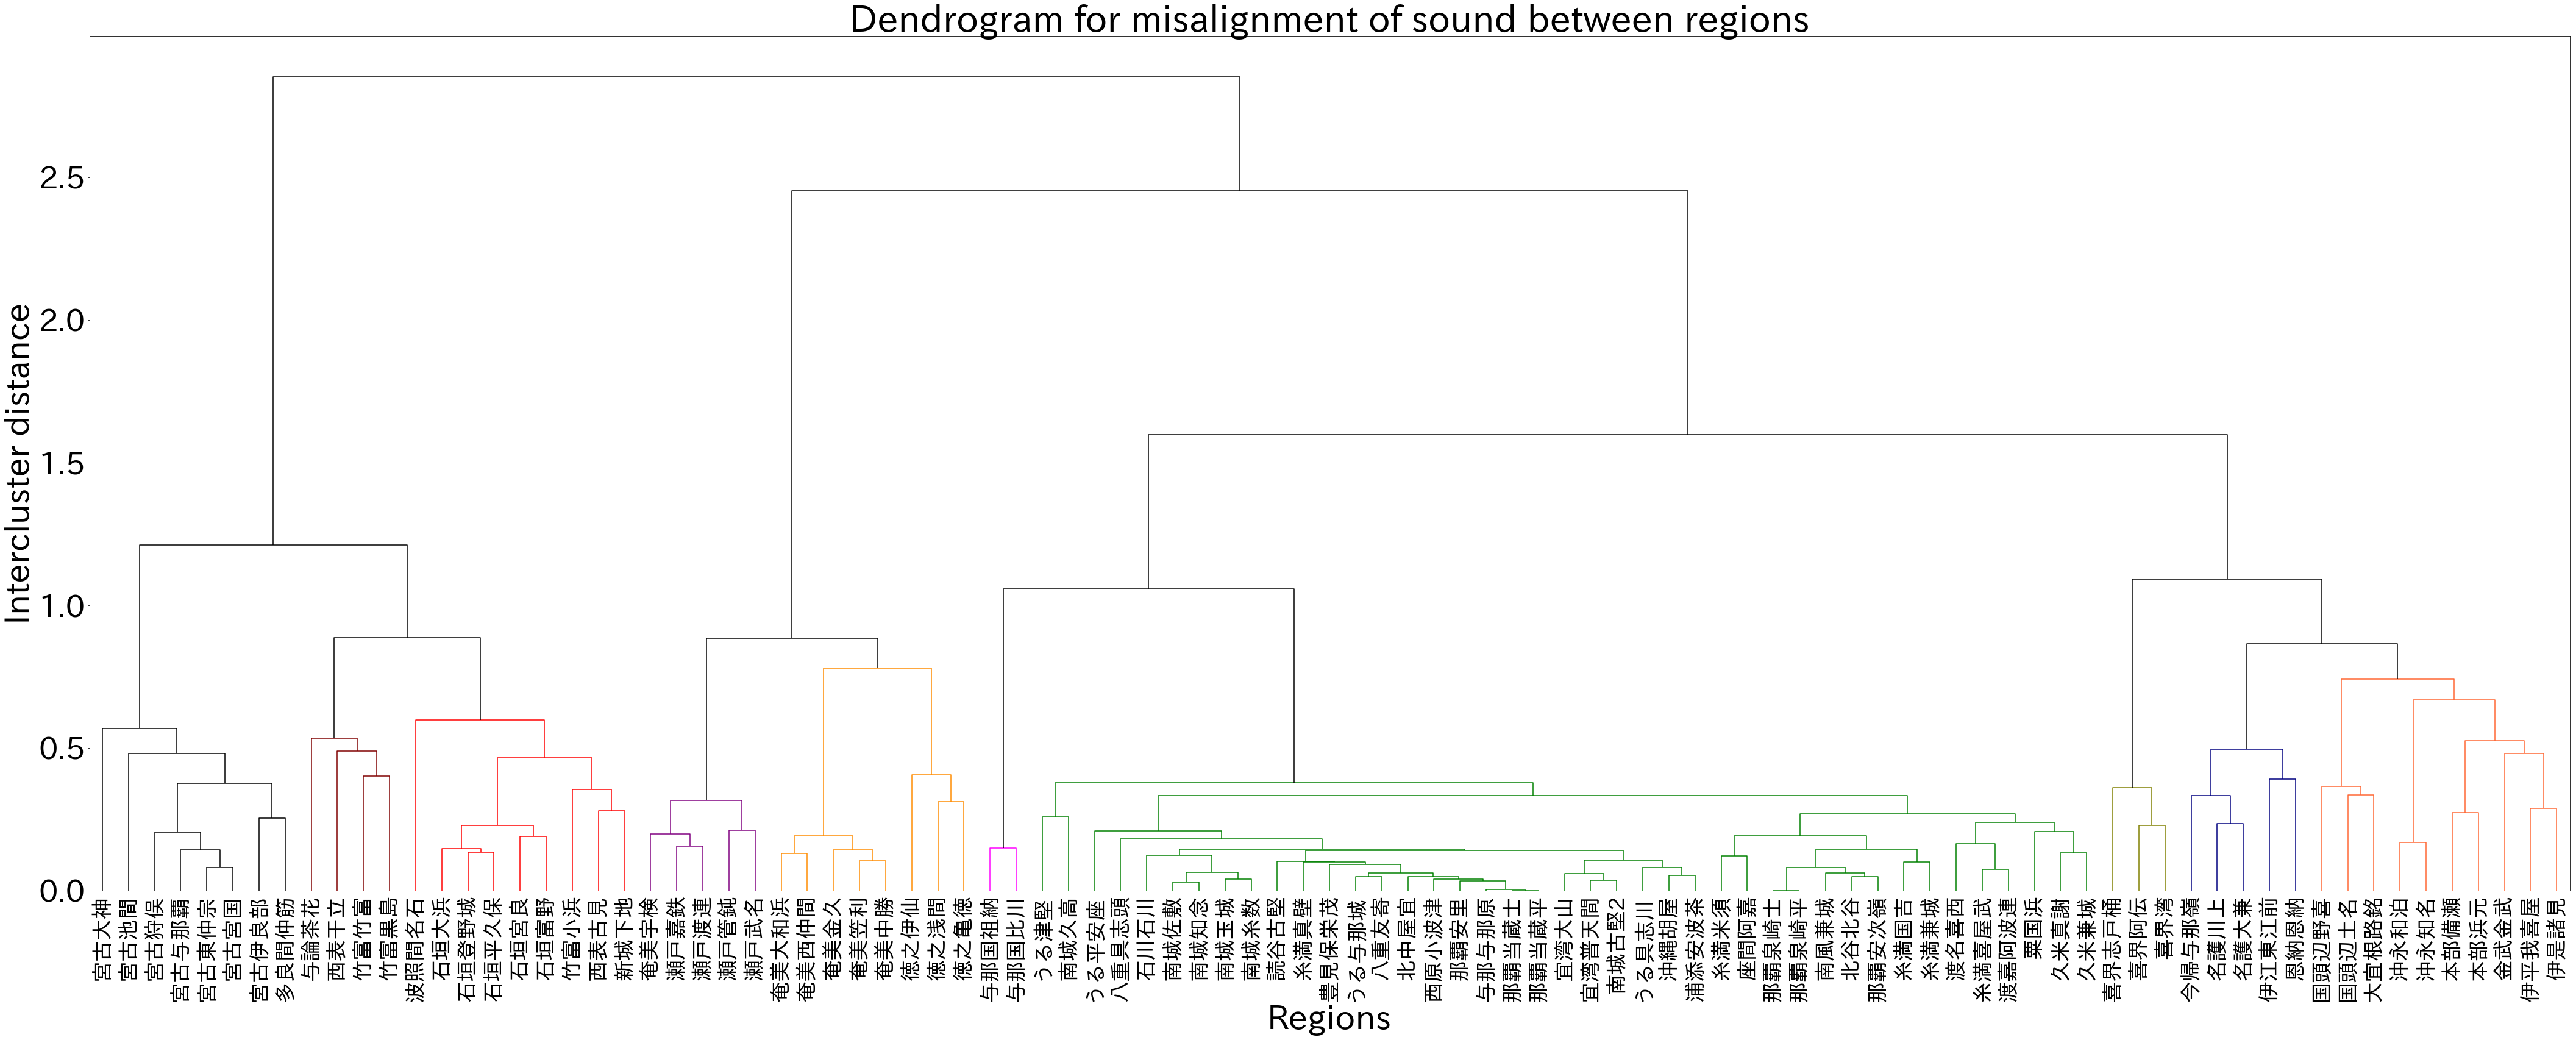

In [9]:
#図の生成
figtitle='Dendrogram for misalignment of sound between regions'
savefile=basepath.format("gram3/pic/dendCD.png")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
hierarchy.set_link_color_palette(color_set) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0.3 * np.max(z[:, 2]), # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()

In [10]:
threshold = 0.3 * np.max(z[:, 2])
c = hierarchy.fcluster(z, threshold, criterion='distance')
print(c)
wf=basepath.format("gram3/pattern/CD.csv")
wdf=pd.DataFrame(hyouzi,index=hyouzi, columns=["市町村"])
wdf["グループ"]=c
wdf.to_csv(wf,header=False, index=False) #シート名[地点名]

[ 5  5  5  5  5  4  4  4  4  4  8  8  8  5  5  5 10 10  2 10 10  9 10 10
 10  9 10 10  9  9  9 10  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  1  1  1  1  1  1  1  1  3  3  3  3  3  2  2  3  3  2  3  3  6  6]


In [17]:
print(len(pdis))

4465


In [18]:
# 距離のまとめ
wfdistance=basepath.format("gram3/pattern/distanceAD.xlsx")
with pd.ExcelWriter(wfdistance, engine='openpyxl') as writer:
    wdf=pd.DataFrame(pdis)
    wdf.to_excel(writer,sheet_name="distance")#シート名[地点名]

In [20]:
print(0.3*np.max(z[:,2]))

0.8965106969993791


In [ ]:
color_set=["#000000","#808080",
    "#800000","#ff0000",
    "#800080","#ff00ff",
    "#008000","#808000",
    "#000080","#ff6633"]